# **AIN 214 - PA4 - FALL 2024**





**Name Surname**   : Furkan Necati İnan


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 13.12.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Building kNN and Logistic Regression Classifiers**

---
**Dataset Path:** "Data/stroke.csv"
---

We will deal with the stroke dataset. The dataset contains demographic and health-related data to predict whether a patient is likely to have a stroke.

**Features:**


* id: Unique identifier (can be ignored for modeling).
* gender: Gender of the patient (categorical).
* age: Age of the patient (numerical).
* hypertension: Whether the patient has hypertension (0 = No, 1 = Yes).
* heart_disease: Whether the patient has heart disease (0 = No, 1 = Yes).
* ever_married: Marital status (categorical).
* work_type: Type of work (categorical).
* Residence_type: Rural or Urban (categorical).
* avg_glucose_level: Average glucose level (numerical).
* bmi: Body Mass Index (numerical).
* smoking_status: Smoking habits (categorical).
* stroke: Target variable (1 = Stroke, 0 = No Stroke).

# **Necessary Imports**

In [469]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# **PART- 1: Data Preprocessing and Visualization (35 Pts)**

---

## 1.1. Explaratory Data Analysis (20 Pts)

* Load the dataset
* Check and Handle Missing Values

  * Identify columns with missing values.
  * Replace missing values using suitable methods (mean or median imputation).

* Check and Handle Outliers

  * Detect outliers in numerical features
  * Handle outliers appropriately

* Convert categorical variables into numerical values.
* Perform data normalization



In [473]:
data_path = "Data/stroke.csv"
data = pd.read_csv(data_path)


In [475]:
missing_cols = data.columns[data.isnull().any()]
print(f"Missing cols: {missing_cols}")

Missing cols: Index(['bmi'], dtype='object')


In [477]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median()) #median imputation 
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [479]:
# Aykırı değerlerin IQR ile tespiti ve işlenmesi
def handle_outliers_iqr(df, numerical_features):
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)  
        Q3 = df[feature].quantile(0.75)  
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        print(f"There are {len(outliers)} outliers on {feature} col. ")
        
        #remove outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

            
    
    return df


numerical_features = ['age', 'avg_glucose_level', 'bmi']


data_cleaned = handle_outliers_iqr(data, numerical_features)


print(data_cleaned.describe())


There are 0 outliers on age col. 
There are 627 outliers on avg_glucose_level col. 
There are 100 outliers on bmi col. 
                 id          age  hypertension  heart_disease  \
count   4383.000000  4383.000000   4383.000000    4383.000000   
mean   36605.005248    40.893762      0.074378       0.039243   
std    21166.169103    22.565008      0.262415       0.194194   
min       67.000000     0.080000      0.000000       0.000000   
25%    17864.500000    23.000000      0.000000       0.000000   
50%    36969.000000    42.000000      0.000000       0.000000   
75%    54870.000000    58.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4383.000000  4383.000000  4383.000000  
mean           91.476126    27.744673     0.037417  
std            22.663253     6.518535     0.189804  
min            55.120000    10.300000     0.000000  
25%            75.075000    2

In [481]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = LabelEncoder()

for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

print(data.head())


      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  


In [483]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())

      id  gender       age  hypertension  heart_disease  ever_married  \
0   9046       1  1.051434             0              1             1   
1  51676       0  0.786070             0              0             1   
2  31112       1  1.626390             0              1             1   
3  60182       0  0.255342             0              0             1   
4   1665       0  1.582163             1              0             1   

   work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0          2               1           2.706375  1.005086               1   
1          3               0           2.121559 -0.098981               2   
2          2               0          -0.005028  0.472536               2   
3          2               1           1.437358  0.719327               3   
4          3               0           1.501184 -0.631531               2   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of numerical features
* Analyze the relationship between categorical features (e.g., gender, work_type) and the target variable (stroke).
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

In [486]:
data['gender'] = data['gender'].astype(str)
data['stroke'] = data['stroke'].astype(str)


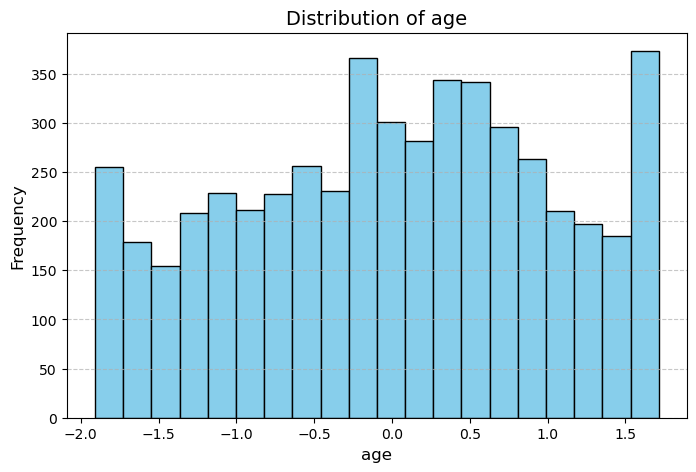

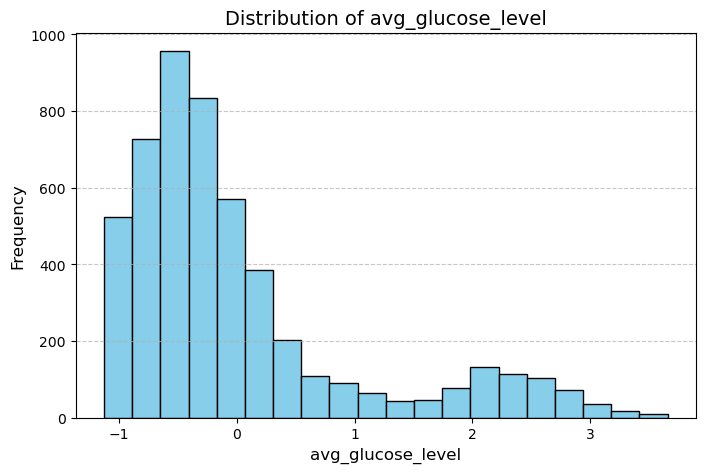

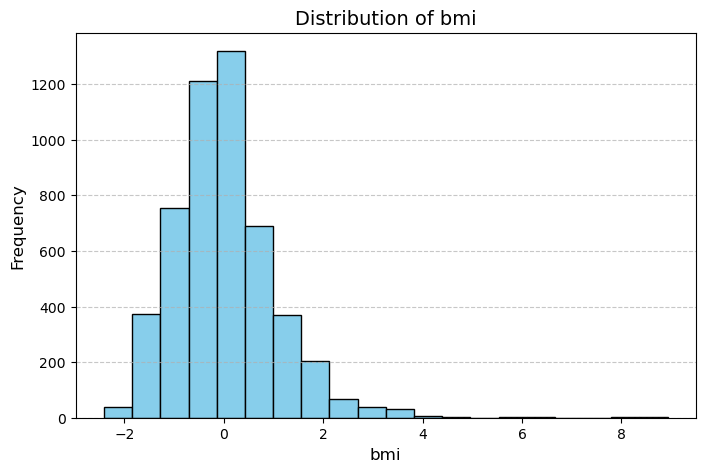

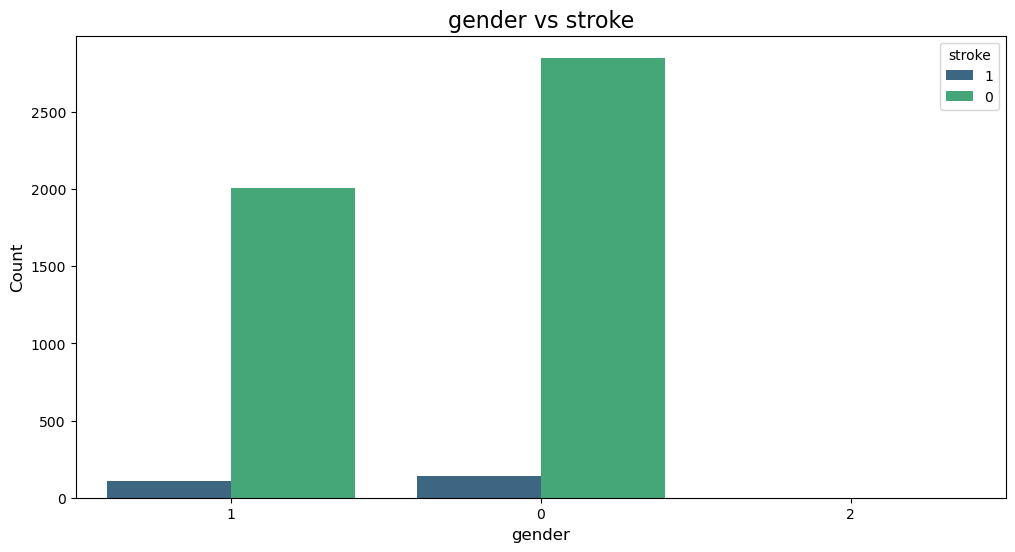

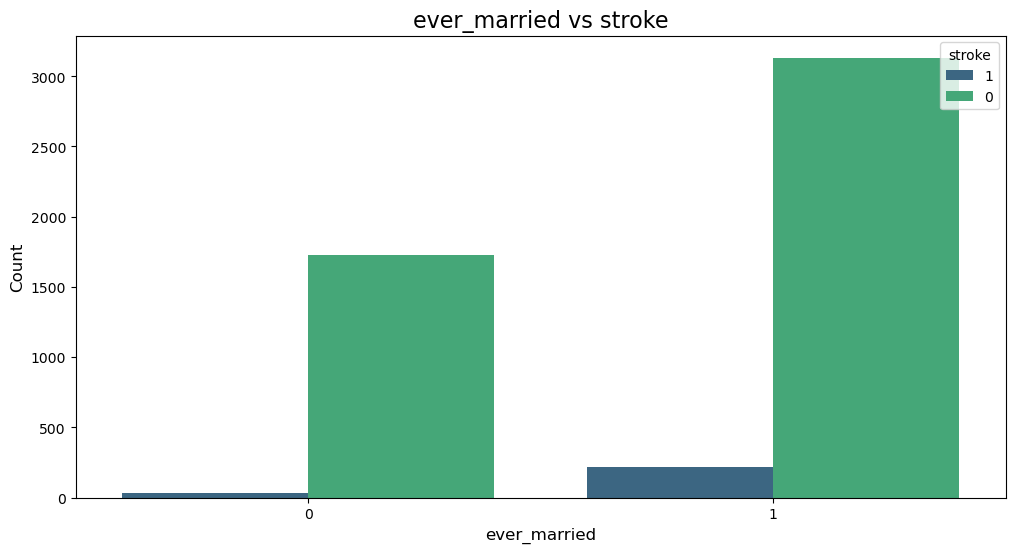

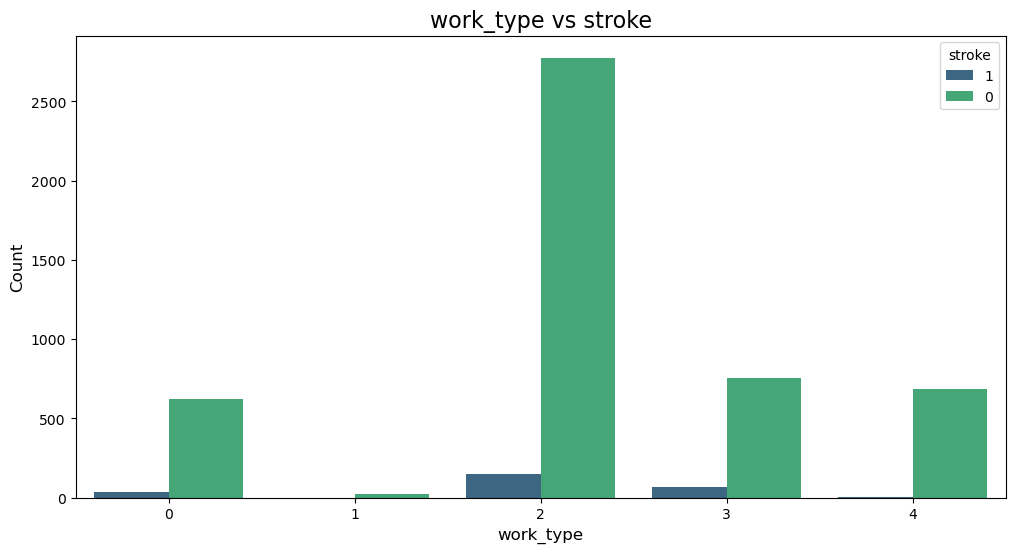

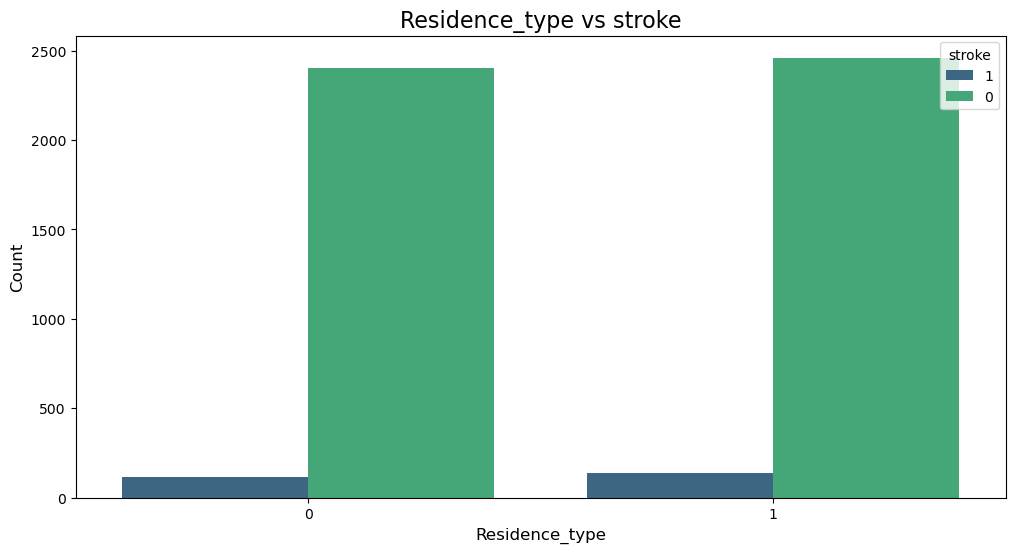

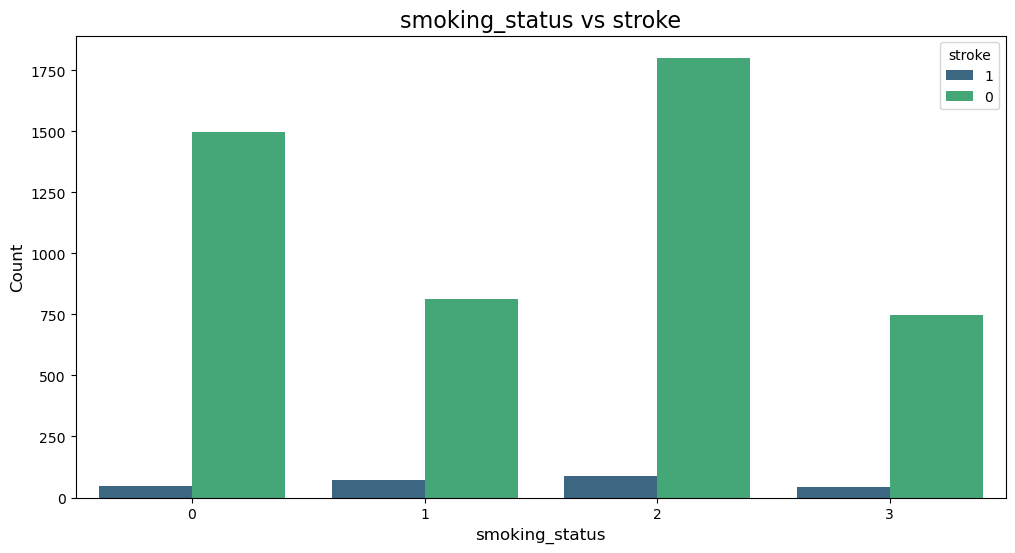

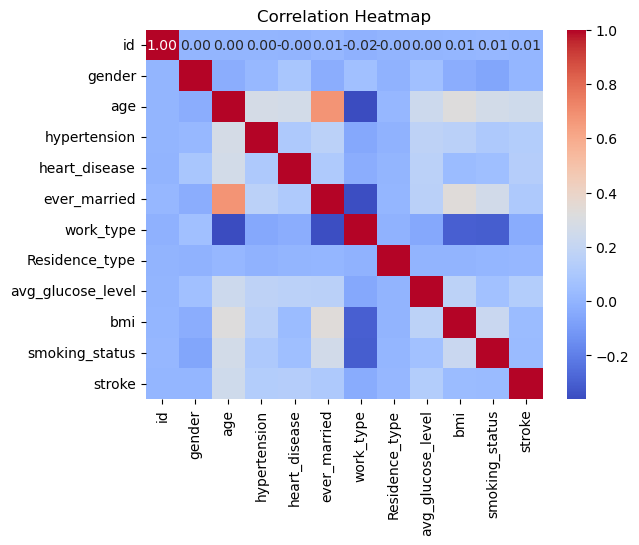

In [488]:
# your code here

# Numeric feature distribution visualization using a loop
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# categoric dist.
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
target_variable = 'stroke'

# Görselleştirme
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=feature, hue=target_variable, palette="viridis")
    plt.title(f"{feature} vs {target_variable}", fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title=target_variable, loc="upper right")
    plt.show()


sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 1. Correlation Heatmap
- The **Stroke** variable shows very weak correlations with other variables.
- Variables like **Age**, **Hypertension**, and **Heart Disease** demonstrate slight positive relationships with **Stroke**.

---

## 2. Smoking Status vs Stroke
- The **Smoking_Status** variable includes categories: 0, 1, 2, and 3.
- There is no significant difference in stroke rates across different smoking habits.

---

## 3. Residence Type vs Stroke
- Stroke rates are quite similar between individuals living in urban and rural areas.
- This indicates that residence type might not be a decisive factor for stroke.

---

## 4. Work Type vs Stroke
- Stroke rates vary across different work types.
- Certain work categories (e.g., category 2) exhibit a higher risk of stroke.

---

## 5. Ever Married vs Stroke
- Marital status seems to have an impact on stroke risk.
- Married individuals show a higher likelihood of experiencing a stroke.

---

## 6. Gender vs Stroke
- There is no significant difference in stroke rates between genders.
- Stroke rates appear to be quite similar between men and women.

---

## 7. Numerical Feature Distributions
- **Age**: The age distribution is close to normal, but there are noticeable differences among various age groups.
- **BMI**: The BMI distribution is fairly wide, with potential outliers present.
- **Avg Glucose Level**: The glucose level distribution is right-skewed, indicating high glucose levels are more common in certain individuals.

---

## General Insights
- Marital status, age, and work type seem to be more decisive factors for stroke risk.
- Smoking habits and residence type might have a lesser impact on stroke.
- Age and glucose levels could be more critical indicators for stroke prediction.




## 1.3. Data Splitting (5 Pts)

* Manually split the dataset into training (70%) and testing (30%) sets
* Shuffle and split the data
* Avoid using predefined functions like train_test_split for this task


In [492]:
# your code here
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

split_index = int(0.7 * len(shuffled_data))

train_data = shuffled_data.iloc[:split_index, :]
test_data = shuffled_data.iloc[split_index:, :]

print(f"Training data size: {train_data.shape}")
print(f"Testing data size: {test_data.shape}")


Training data size: (3577, 12)
Testing data size: (1533, 12)


# **PART- 2: Model Building (30 points)**

Implement two classification models:

* k-Nearest Neighbors (kNN)
* Logistic Regression


***You can use scikit-learn***




## 2.1. kNN Classifier (15 Pts)
* Build and train the kNN model
* Choose the optimal k value using Minkowski distance with at least two different values for p


In [496]:


X_train = train_data.drop(['id', 'stroke'], axis=1)  # Drop irrelevant columns
y_train = train_data['stroke']
X_test = test_data.drop(['id', 'stroke'], axis=1)
y_test = test_data['stroke']

p_values = [1, 2]  # manhattan distance (p=1), euclidean distance (p=2)
optimal_k = None
highest_accuracy = 0

for p in p_values:
    print(f"\nUsing Minkowski distance with p = {p}")
    for k in range(1, 11):  # Testing k values from 1 to 10
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"k = {k}, Accuracy = {accuracy:.4f}")
        
        # Track the optimal k and p
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            optimal_k = (k, p)

print(f"\nOptimal k = {optimal_k[0]} with p = {optimal_k[1]} yielding accuracy = {highest_accuracy:.4f}")



Using Minkowski distance with p = 1
k = 1, Accuracy = 0.9152
k = 2, Accuracy = 0.9485
k = 3, Accuracy = 0.9419
k = 4, Accuracy = 0.9504
k = 5, Accuracy = 0.9491
k = 6, Accuracy = 0.9498
k = 7, Accuracy = 0.9498
k = 8, Accuracy = 0.9498
k = 9, Accuracy = 0.9491
k = 10, Accuracy = 0.9504

Using Minkowski distance with p = 2
k = 1, Accuracy = 0.9145
k = 2, Accuracy = 0.9465
k = 3, Accuracy = 0.9380
k = 4, Accuracy = 0.9504
k = 5, Accuracy = 0.9491
k = 6, Accuracy = 0.9498
k = 7, Accuracy = 0.9485
k = 8, Accuracy = 0.9498
k = 9, Accuracy = 0.9498
k = 10, Accuracy = 0.9504

Optimal k = 4 with p = 1 yielding accuracy = 0.9504


## 2.2. Logistic Regression (15 Pts)
* Build and train the Logistic Regression model

In [498]:
# your code here

X_train = train_data.drop(['id', 'stroke'], axis=1)
y_train = train_data['stroke']
X_test = test_data.drop(['id', 'stroke'], axis=1)
y_test = test_data['stroke']

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9504



# **PART- 3: Model Evaluation (35 points)**



## 3.1 Confusion Matrix (15)

Analysis of the confusion matrices for both models:

* Plot and interpret the confusion matrices
* Display accuracy, precision, recall, and F1-score for both models



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

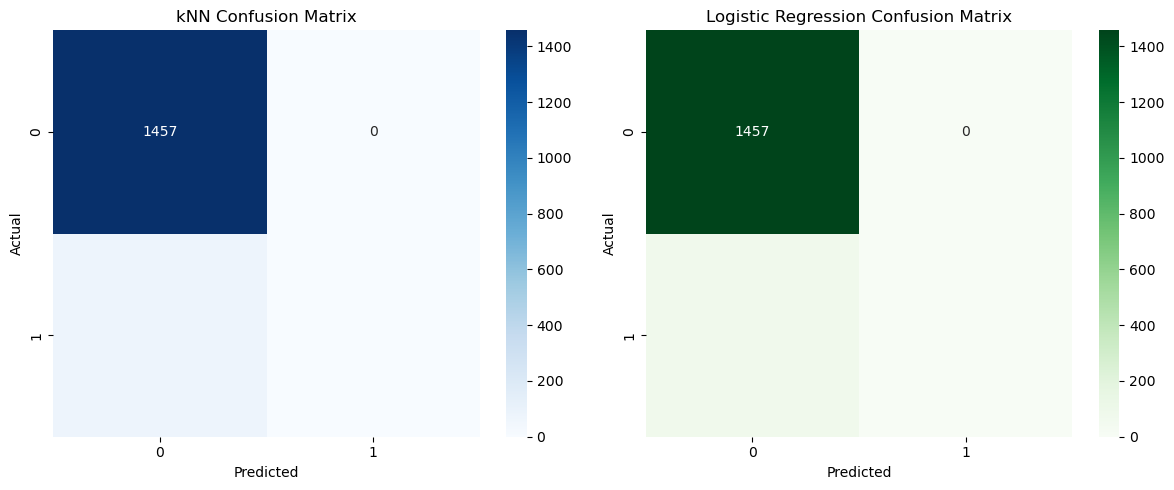

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

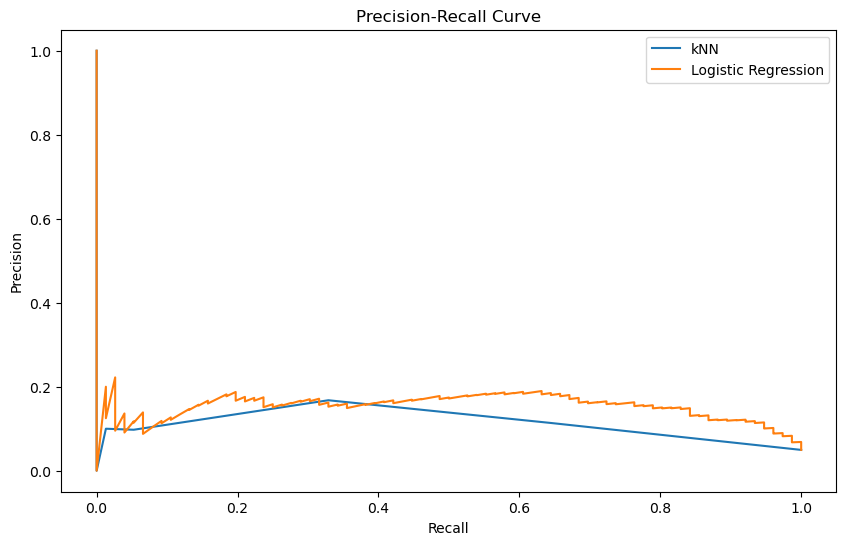


Comparison of Models:
kNN Accuracy: 0.9504
Logistic Regression Accuracy: 0.9504

Hypothesis:
Logistic Regression may perform better if the dataset is linearly separable or less sensitive to noisy data.
kNN might perform well for local patterns but could be sensitive to feature scaling or noise.


In [501]:
# your code here



knn_y_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred, output_dict=True)


log_reg_y_pred = log_reg.predict(X_test)
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)
log_reg_report = classification_report(y_test, log_reg_y_pred, output_dict=True)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# knn Confusion Matrix
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("kNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Logistic Regression Confusion Matrix
sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


print("kNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_y_pred))


knn_probs = knn.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]

knn_precision, knn_recall, _ = precision_recall_curve(y_test_int, knn_probs)
log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test_int, log_reg_probs)


plt.figure(figsize=(10, 6))
plt.plot(knn_recall, knn_precision, label="kNN")
plt.plot(log_reg_recall, log_reg_precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


print("\nComparison of Models:")
print(f"kNN Accuracy: {knn_report['accuracy']:.4f}")
print(f"Logistic Regression Accuracy: {log_reg_report['accuracy']:.4f}")

# Hypothesis
print("\nHypothesis:")
print("Logistic Regression may perform better if the dataset is linearly separable or less sensitive to noisy data.")
print("kNN might perform well for local patterns but could be sensitive to feature scaling or noise.")


## 3.2 Precision-Recall Curves (5)

Evaluate the Precision-Recall curves for both models:

* Plot and analyze the curves

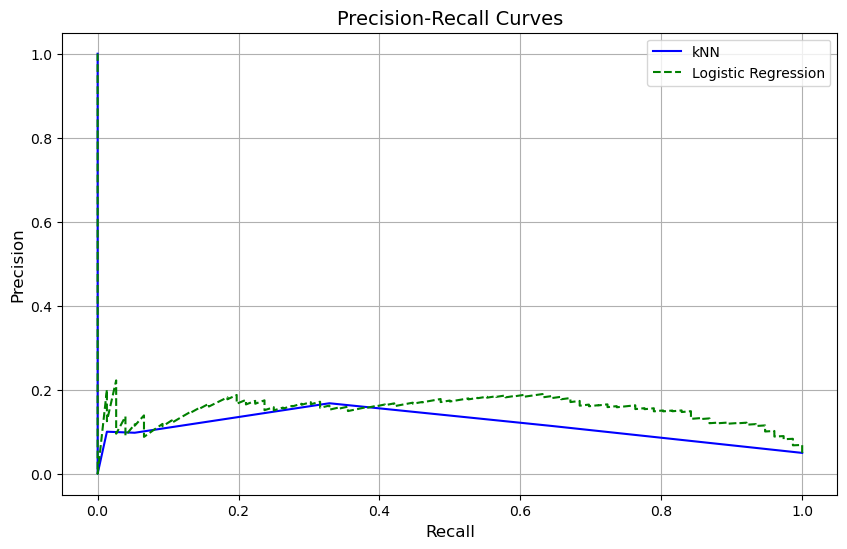

In [505]:

y_test = y_test.astype(int)


knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test, log_reg_probs)


plt.figure(figsize=(10, 6))
plt.plot(knn_recall, knn_precision, label="kNN", linestyle='-', color='blue')
plt.plot(log_reg_recall, log_reg_precision, label="Logistic Regression", linestyle='--', color='green')
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves", fontsize=14)
plt.legend(loc="best", fontsize=10)
plt.grid()
plt.show()


## 

## 3.3. Compare the Model (15 Pts)

Prepare a detailed evaluation report with metrics, visualizations, and comparative analysis.

* Compare the performance of kNN and Logistic Regression based on the metrics.

* Discuss which model performs better and hypothesize why.

## 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

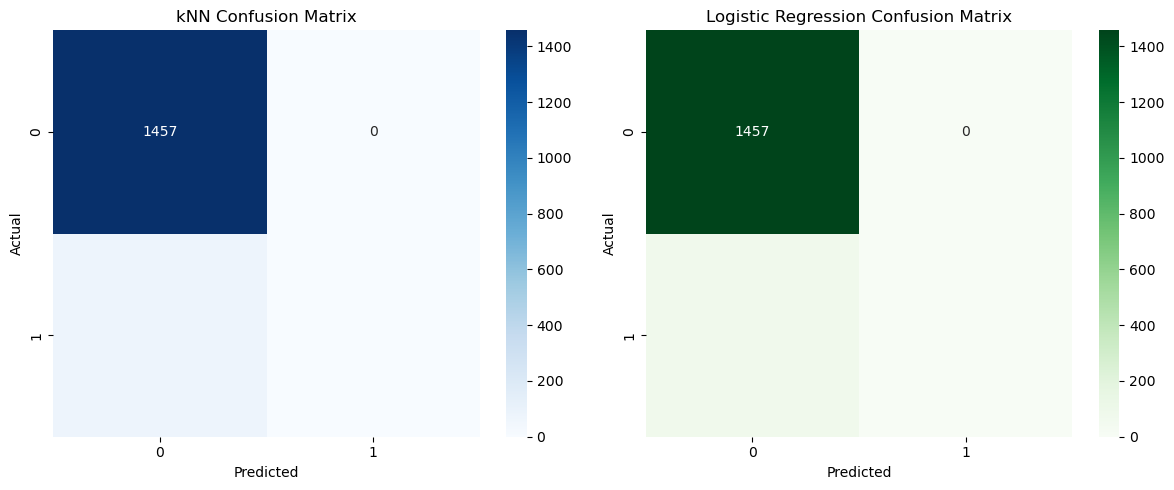

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

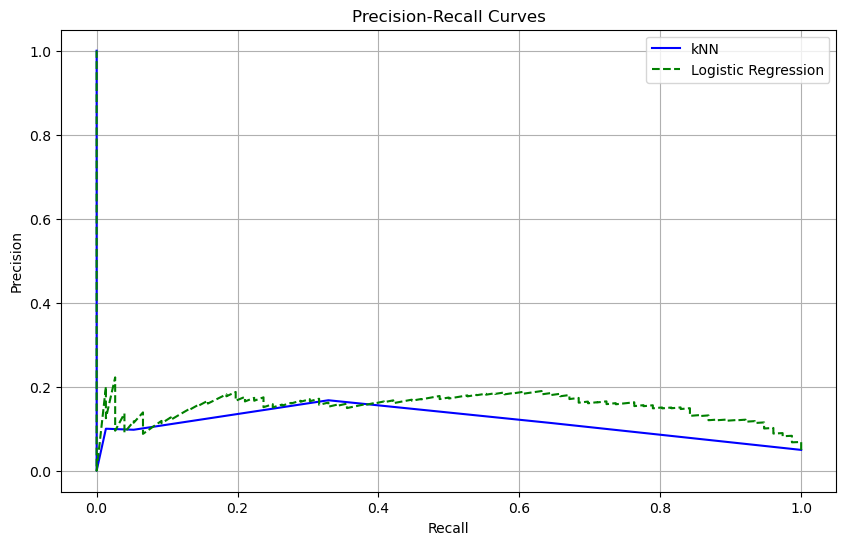


Comparison of Models:
kNN Accuracy: 0.9504, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Logistic Regression Accuracy: 0.9504, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000


In [511]:


X_train = train_data.drop(['id', 'stroke'], axis=1)
y_train = train_data['stroke']
X_test = test_data.drop(['id', 'stroke'], axis=1)
y_test = test_data['stroke']


knn_y_pred = knn.predict(X_test)
log_reg_y_pred = log_reg.predict(X_test)


knn_cm = confusion_matrix(y_test, knn_y_pred)
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)


knn_report = classification_report(y_test, knn_y_pred, output_dict=True)
log_reg_report = classification_report(y_test, log_reg_y_pred, output_dict=True)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("kNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

print("kNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_y_pred))


y_test_int = y_test.astype(int)

# Precision-Recall Curves
knn_probs = knn.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]

knn_precision, knn_recall, _ = precision_recall_curve(y_test_int, knn_probs)
log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test_int, log_reg_probs)

plt.figure(figsize=(10, 6))
plt.plot(knn_recall, knn_precision, label="kNN", linestyle='-', color='blue')
plt.plot(log_reg_recall, log_reg_precision, label="Logistic Regression", linestyle='--', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend(loc="best")
plt.grid()
plt.show()


print("\nComparison of Models:")
print(f"kNN Accuracy: {knn_report['accuracy']:.4f}, Precision: {knn_report['1']['precision']:.4f}, "
      f"Recall: {knn_report['1']['recall']:.4f}, F1-Score: {knn_report['1']['f1-score']:.4f}")
print(f"Logistic Regression Accuracy: {log_reg_report['accuracy']:.4f}, Precision: {log_reg_report['1']['precision']:.4f}, Recall: {log_reg_report['1']['recall']:.4f}, F1-Score: {log_reg_report['1']['f1-score']:.4f}")



## Hypothesis and Conclusion

Given that both Logistic Regression and kNN models achieve virtually identical accuracy scores, it is not possible to favor one model based solely on this metric. Although the hypothesis suggests that Logistic Regression may outperform kNN when the dataset is linearly separable and less noisy, and that kNN might excel at capturing local patterns, our current results do not demonstrate a clear advantage for either model. Both models failed to correctly identify the positive class, resulting in zero precision, recall, and F1-scores for that class.

To gain meaningful insights, it will be necessary to explore additional metrics, techniques, and data strategies. Approaches like adjusting class weights, applying sampling methods (oversampling or undersampling), or fine-tuning model parameters may help improve performance on the underrepresented positive class. Only after such measures are taken can we truly assess which model aligns more closely with the initial hypothesis.


## Model Comparison and Evaluation

The classification reports for both k-Nearest Neighbors (kNN) and Logistic Regression models show that they achieve high accuracy on this dataset. However, both models fail to correctly classify any instances of the positive class (stroke = 1). This leads to zero precision, recall, and F1-scores for that class.

This issue might be due to class imbalance or the inability of the models to detect patterns for the minority class. Although tuning parameters (like `k` in kNN) or adjusting model settings might help, more advanced techniques (e.g., oversampling, undersampling, or using class weights) could be necessary to improve performance on the positive class.


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw4.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.